<a href="https://colab.research.google.com/github/LCaravaggio/NLP/blob/main/04_reducci%C3%B3n/UMAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set(context='notebook', style='white', rc={'figure.figsize':(14,10)})

In [3]:
digits = load_digits()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(digits.data,
                                                    digits.target,
                                                    stratify=digits.target,
                                                    random_state=42)

In [5]:
svc = SVC().fit(X_train, y_train)
knn = KNeighborsClassifier().fit(X_train, y_train)

In [6]:
svc.score(X_test, y_test), knn.score(X_test, y_test)

(0.9911111111111112, 0.9844444444444445)

In [8]:
%%capture
!pip install umap-learn
import umap.umap_ as umap

In [9]:
trans = umap.UMAP(n_neighbors=5, random_state=42).fit(X_train)

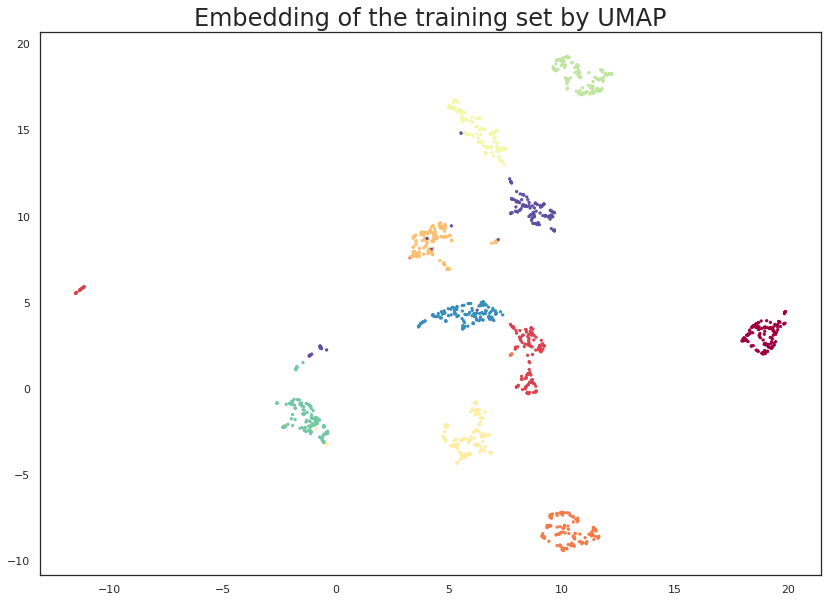

In [10]:
plt.scatter(trans.embedding_[:, 0], trans.embedding_[:, 1], s= 5, c=y_train, cmap='Spectral')
plt.title('Embedding of the training set by UMAP', fontsize=24);

In [11]:
svc = SVC().fit(trans.embedding_, y_train)
knn = KNeighborsClassifier().fit(trans.embedding_, y_train)

In [12]:
%time test_embedding = trans.transform(X_test)

CPU times: user 8.92 s, sys: 66.3 ms, total: 8.99 s
Wall time: 8.97 s


Text(0.5, 1.0, 'Embedding of the test set by UMAP')

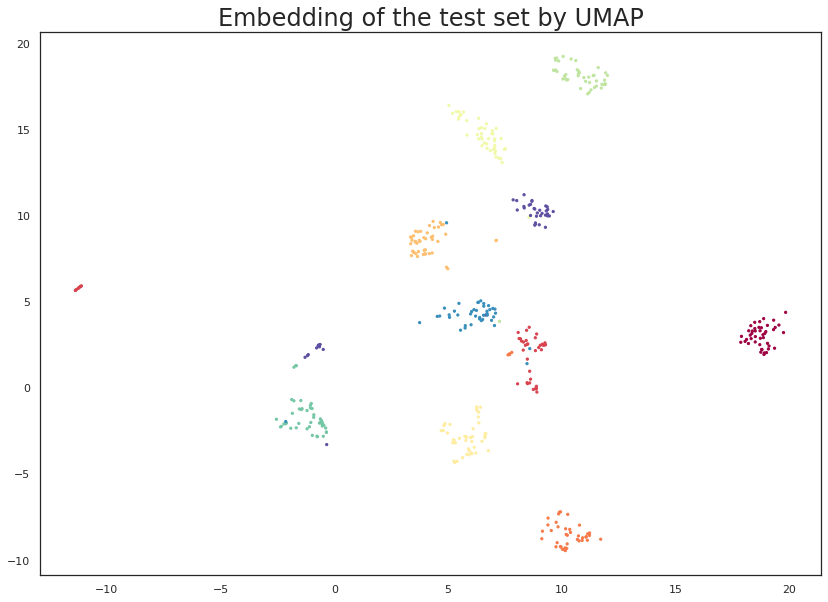

In [13]:
plt.scatter(test_embedding[:, 0], test_embedding[:, 1], s= 5, c=y_test, cmap='Spectral')
plt.title('Embedding of the test set by UMAP', fontsize=24)

In [14]:
svc.score(trans.transform(X_test), y_test), knn.score(trans.transform(X_test), y_test)

(0.9666666666666667, 0.9822222222222222)